# Hydrological Analysis at Matreier Tauernhaus

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/rolfbecker/Anna/HEAD?labpath=Plot_H_and_Q%2FPlot_H_and_Q_V001.ipynb)

## Water Level - Runoff Relationship

### Import Libs and Define File Names

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from scipy.optimize import curve_fit
import os

In [2]:
#import watermark
#%load_ext watermark
#%watermark -p pandas,numpy,matplotlib

In [3]:
datadir = r"./data/"
os.listdir(r"./data/")

['Q.txt',
 'Q-Monatsmaxima-212076.csv',
 'Q-Monatsmaxima-212076.xlsx',
 'W-Monatsmaxima-212076.csv',
 'HMRA_project_partB2.m',
 'h.txt',
 'W-Monatsmaxima-212076.xlsx',
 'date.txt']

In [4]:
pfname_H = datadir + "W-Monatsmaxima-212076.csv"
pfname_Q = datadir + "Q-Monatsmaxima-212076.csv"

### Read File Info / Metadata

In [6]:
# Print first raw text lines from the Q file 
f = open(pfname_Q, "r",encoding="cp1252")
for i in range(25): print(f.readline().strip())
f.close()

Messstelle:                ;Matreier Tauernhaus
HZB-Nummer:                ;212076
HD-Nummer:                 ;
DBMS-Nummer:               ;7001131
Gewässer:                  ;Tauernbach
Sachgebiet:                ;OWF
Dienststelle:              ;HD-Tirol
Messstellenbetreiber:      ;Hydrographischer Dienst
orogr.Einzugsgebiet [km²]: ;59,9
Pegelnullpunkt:
gültig seit:             ;Höhe [m ü.A.]:
01.07.1930              ;01503,55
01.01.1972              ;01502,55
01.01.1976              ;01502,29
Bundesmeldenetz(BMN)-Koordinaten:
gültig seit:             ;Rechtswert y [m] - Hochwert x [m]:
01.01.1930              ;386424,00 - 220238,00
Exportzeitreihe:           ;(7001131,Abfluss,M,Max,M,1,F,Z,0,,,)
Einheit:                   ;[m³/s]
Exportzeitraum:            ;[24.01.1951 12:00,01.01.2019 00:00]
Werte:
24.01.1951 12:00:00; 0,150
14.02.1951 12:00:00; 0,130
31.03.1951 12:00:00; 0,230
30.04.1951 12:00:00;  6,10


### Read Q-Data

In [13]:
# Read the values
Q = pd.read_csv(pfname_Q, 
                encoding="cp1252",
                names=["dateQ","Q"], 
                parse_dates=["dateQ"],
                dtype={"Q": np.float64},
                skiprows=21, 
                sep=";", 
                decimal=",",
                na_values=" Lücke"
               )

Q["log10_Q"] = np.log10(Q["Q"])

# Add a new column rounded to month
Q["monQ"]=Q["dateQ"].astype("datetime64[M]")

# Set the date as index
Q.set_index("dateQ", inplace=True)
Q["yearQ"]=Q.index.year

# Size of the dataframe
print(f"\nQ.shape={Q.shape}\n")

Q.head()


Q.shape=(817, 4)



,Q,log10_Q,monQ,yearQ
dateQ,,,,
1951-01-24 12:00:00,0.15,-0.823909,1951-01-01,1951
1951-02-14 12:00:00,0.13,-0.886057,1951-02-01,1951
1951-03-31 12:00:00,0.23,-0.638272,1951-03-01,1951
1951-04-30 12:00:00,6.10,0.785330,1951-04-01,1951
1951-05-28 12:00:00,18.10,1.257679,1951-05-01,1951


In [14]:
Q.index.year

Int64Index([1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2019],
           dtype='int64', name='dateQ', length=817)

### Read H-Data

In [15]:
# Read the values
H = pd.read_csv(pfname_H, 
                names=["dateH","H"], 
                parse_dates=["dateH"],
                dtype={"H": np.float64},
                skiprows=21, 
                sep=";", 
                decimal=",",
                na_values=" Lücke"
               )

H["log10_H"] = np.log10(H["H"])

# Add a new column rounded to month
H["monH"]=H["dateH"].astype("datetime64[M]")

# Set the date as index
H.set_index("dateH", inplace=True)
H["yearH"]=H.index.year

# Size of the dataframe
print(f"\nH.shape={H.shape}\n")

H.head()


H.shape=(673, 4)



,H,log10_H,monH,yearH
dateH,,,,
1963-01-25,8.0,0.903090,1963-01-01,1963
1963-02-13,8.0,0.903090,1963-02-01,1963
1963-03-24,5.0,0.698970,1963-03-01,1963
1963-04-30,34.0,1.531479,1963-04-01,1963
1963-05-28,79.0,1.897627,1963-05-01,1963


### Plot H-Data

[]

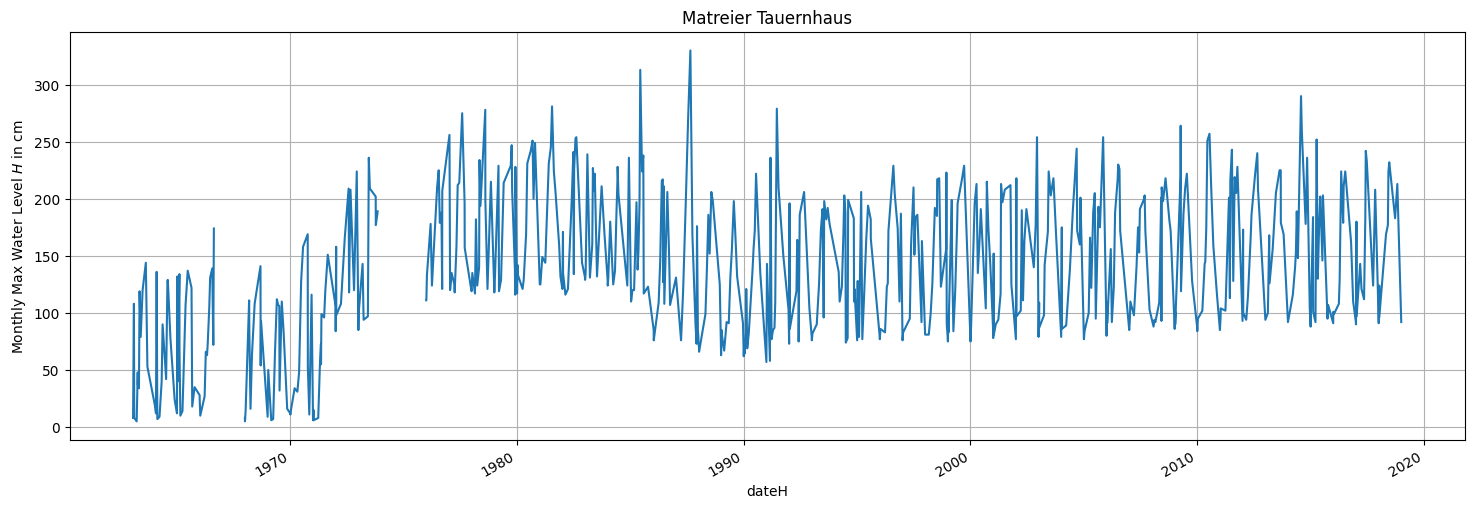

In [16]:
fig,ax=plt.subplots(figsize=(18,6))
H["H"].plot(ax=ax)
ax.set_ylabel(r"Monthly Max Water Level $H$ in cm")
ax.set_title("Matreier Tauernhaus")
ax.grid(True)
plt.plot()

In [17]:
# Limit the time to zoom in
idxH=(H.index > "2014")

[]

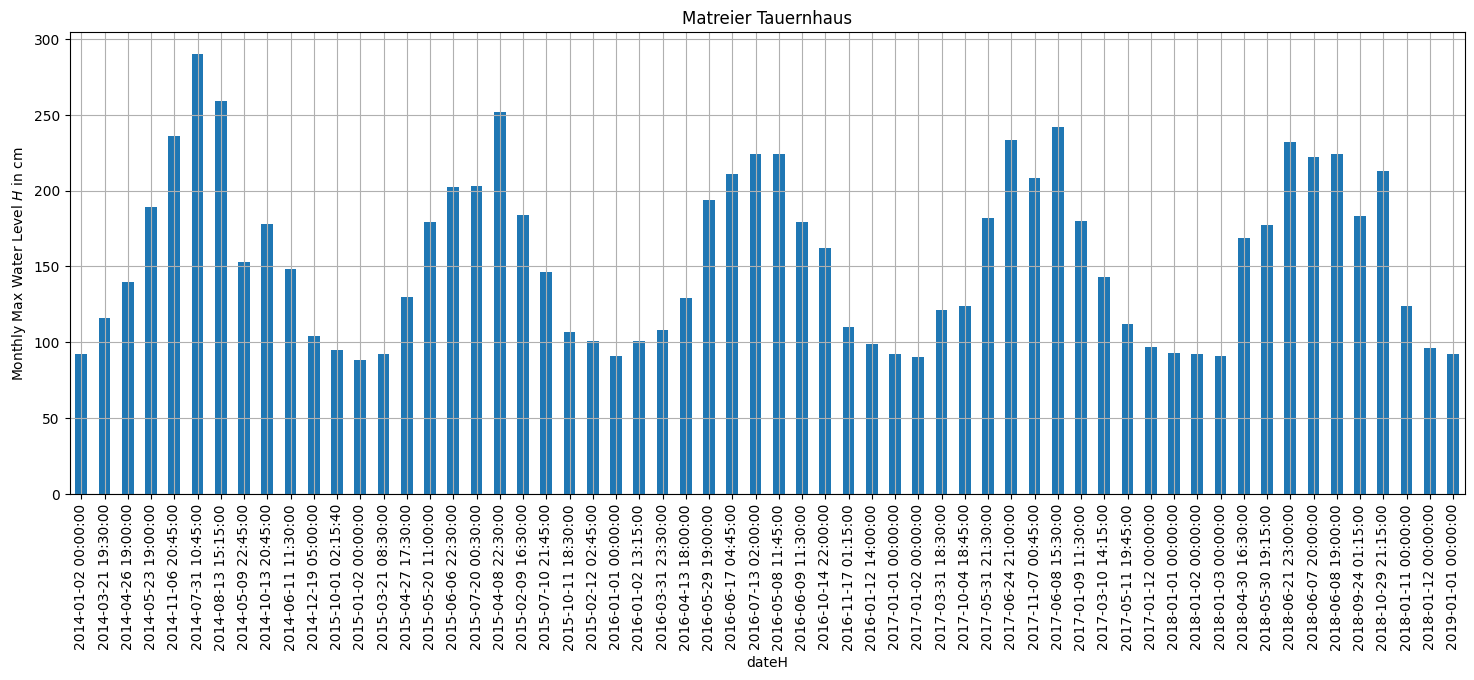

In [18]:
fig,ax=plt.subplots(figsize=(18,6))
H["H"][idxH].plot.bar(ax=ax)
ax.set_ylabel(r"Monthly Max Water Level $H$ in cm")
ax.set_title("Matreier Tauernhaus")
ax.grid(True)
plt.plot()

### Plot Q-Data

[]

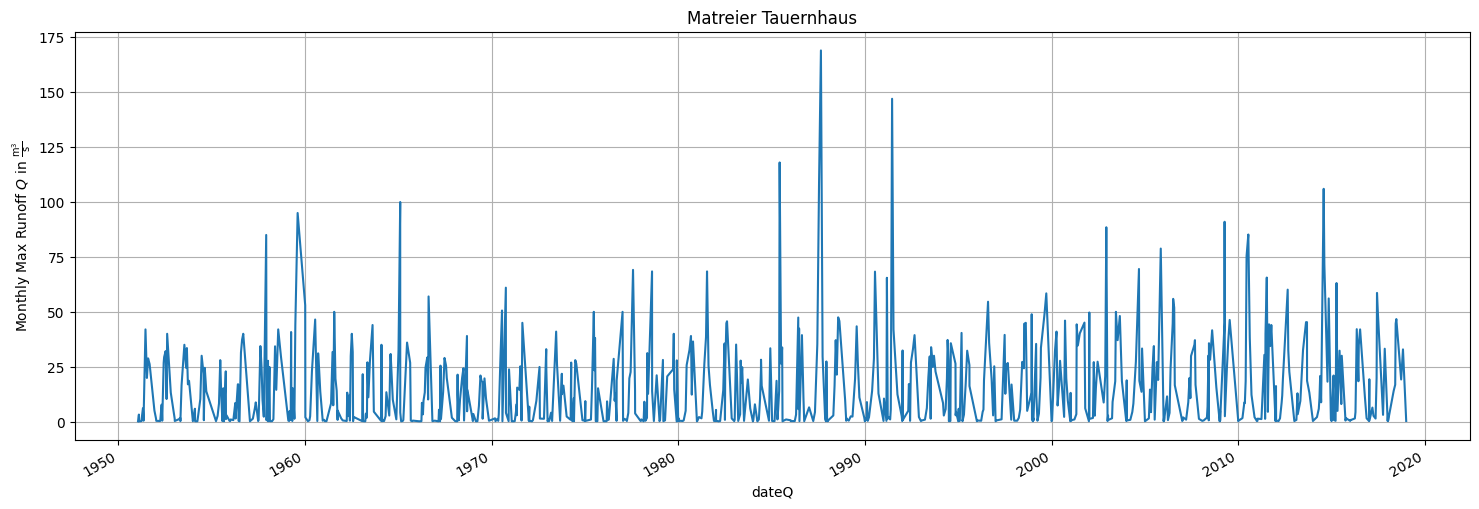

In [19]:
fig,ax=plt.subplots(figsize=(18,6))
Q["Q"].plot(ax=ax)
ax.set_ylabel(r"Monthly Max Runoff $Q$ in $\mathrm{\frac{m^3}{s}}$")
ax.set_title("Matreier Tauernhaus")
ax.grid(True)
plt.plot()

In [20]:
# Limit the time
idxQ = (Q.index > "2014")

[]

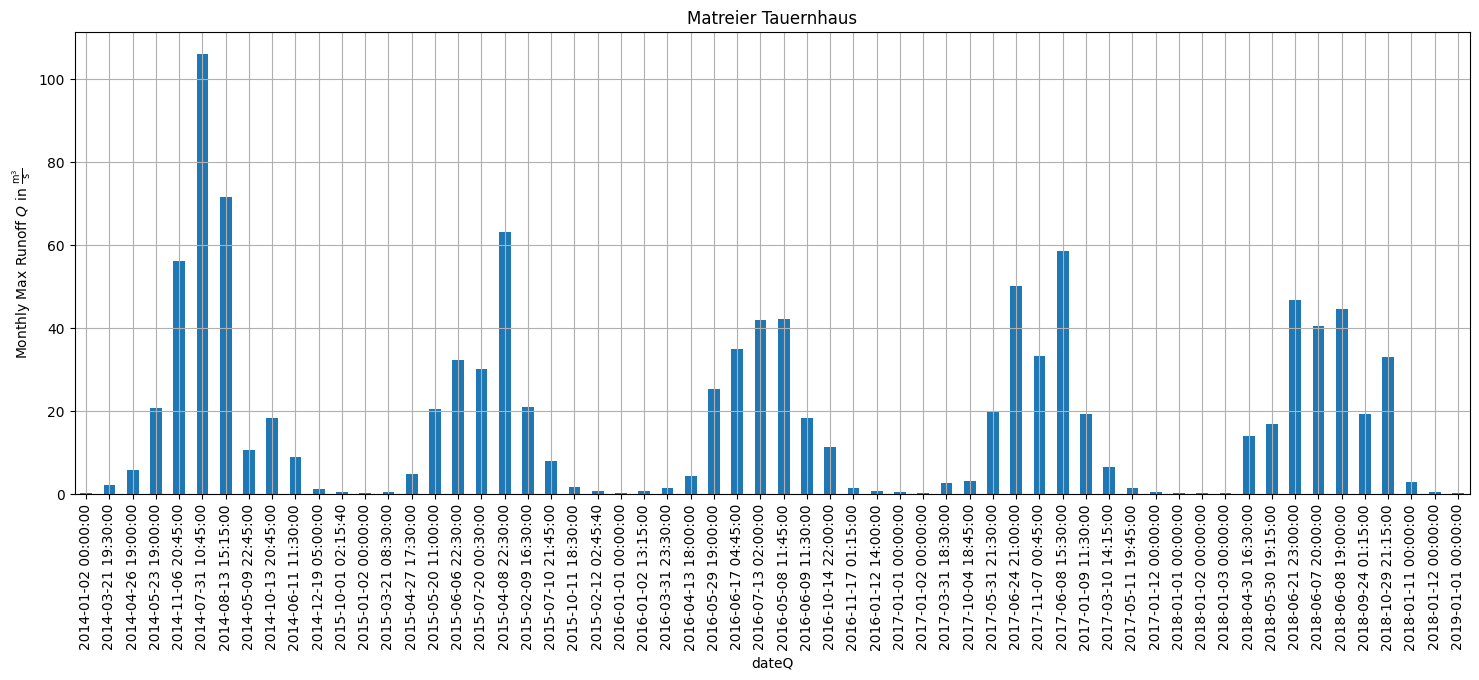

In [21]:
fig,ax=plt.subplots(figsize=(18,6))
Q["Q"][idxQ].plot.bar(ax=ax)
ax.set_ylabel(r"Monthly Max Runoff $Q$ in $\mathrm{\frac{m^3}{s}}$")
ax.set_title("Matreier Tauernhaus")
ax.grid(True)
plt.plot()

## Merge H and Q on their Common Timestamps to Analyse their Relationship

In [24]:
# Merge the dataframes where their indexes match exactly

df=H.merge(Q,"inner", left_index=True, right_index=True)

print(f"\ndf.shape={df.shape}\n")

df.head()


df.shape=(493, 8)



,H,log10_H,monH,yearH,Q,log10_Q,monQ,yearQ
1976-09-12 12:00:00,121.0,2.082785,1976-09-01,1976,0.370,-0.431798,1976-09-01,1976
1977-01-18 05:00:00,120.0,2.079181,1977-01-01,1977,0.350,-0.455932,1977-01-01,1977
1977-04-02 01:00:00,118.0,2.071882,1977-04-01,1977,0.277,-0.557520,1977-04-01,1977
1977-04-30 18:00:00,158.0,2.198657,1977-04-01,1977,4.000,0.602060,1977-04-01,1977
1977-05-20 16:00:00,212.0,2.326336,1977-05-01,1977,19.700,1.294466,1977-05-01,1977


In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(df.H,df.Q,".")
ax.set_xlabel("Water Level H in $\mathrm{cm}$")
ax.set_ylabel(r"Runoff Q in $\mathrm{m^3}$")
ax.set_title(r"Water Level - Runoff Relationship at Matreier Tauernhaus")
ax.grid(True)
plt.plot()

## Interactive Plot with plotly

In [23]:
import plotly
from plotly.subplots import make_subplots
from ipywidgets import interact
from plotly.offline import iplot
import plotly.express as px

#from plotly.graph_objs import graph_objs as go
#from IPython.html.widgets import interact

In [ ]:
#%watermark -p plotly,ipywidgets

In [ ]:
plotly.offline.init_notebook_mode()

In [ ]:
def plotQH(a,b,c=50):
    hmax = 330.
    h = np.linspace(c,hmax,100)
    q = a*(h-c)**b
    fig = px.scatter(df[df.index > "1900"], x="H", y="Q", hover_data=['monQ'], color="yearQ", width=800, height=600)
    fig.add_scatter(x=h, y=q)
    fig.show()

interact(plotQH, a=(0,1e-4,1e-6), b=(0,5,0.1), c=(0,60,1))

## Parameter adjustment on linear axes is much easier!

$$
y = mx+b \; , \; \mathrm{with}\; x=\log_{10}(H) \; \mathrm{and}\; y=\log_{10}(Q) 
$$

$$
10^y = 10^{mx+b} = 10^{mx} \cdot 10^b = (10^x)^m \cdot 10^b 
$$

$$
a = 10^b
$$

$$
\Leftrightarrow Q = aH^m 
$$


In [ ]:
a = 0.002
m = 3.1
s_pot = f"$Q={a:.2g}" + "H^{" + f"{m:.2f}" +"}$"
s_pot

In [ ]:
def plotQH2(x1=1.8, y1=-0.4, x2=2.6, y2=2.2):
    
    N = 50

    x = np.linspace(x1,x2,N)
    
    m = (y2-y1)/(x2-x1) # and m = (y-y1)/(x-x1) <=> y = m*(x-x1)+y1 <=> y = m*x - m*x1 + y1 = m*x + (-m*x1+y1) = m*x + b
    
    b = -m*x1 + y1
    
    y = m*x + b
    
    a = 10**b

    # convert all data
    h = 10**x
    
    # brute force
    q = 10**y

    # smarter, test for conversion
    qt = a*h**m
    
    # annotation string for lin function
    s_lin = f"$y={m:.2f}\;x{b:+.2f}$"

    # annotation string for potency function
    s_pot = f"$Q=({a:.2g})\cdot " + "H^{" + f"{m:.2f}" +"}$"

    ### MAKE SUBPLOTS ###
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Log-Log Plot", "Linear Axes"))
    
    # log-log plot 
    trace1d = px.scatter(df[df.index > "1900"], x="log10_H", y="log10_Q", hover_data=['monQ'], color="yearQ")
    
    # lin model on log-log scale
    trace1m = px.line(x=[x1, x2], y=[y1, y2], markers=True)
    
    # linear scale
    trace2d = px.scatter(df[df.index > "1900"], x="H", y="Q", hover_data=['monQ'], color="yearQ", title="Linear Axes")

    # exp model
    # trace2m = px.line(x=h, y=q) # brute force
    trace2m = px.line(x=h, y=qt) # smarter, test
    trace2p = px.scatter(x=[h[0], h[-1]], y=[q[0], q[-1]])

    fig.append_trace(trace1d["data"][0], row=1, col=1)
    fig.append_trace(trace1m["data"][0], row=1, col=1)
    
    fig.append_trace(trace2d["data"][0], row=1, col=2)
    fig.append_trace(trace2m["data"][0], row=1, col=2)
    fig.append_trace(trace2p["data"][0], row=1, col=2)

    fig['layout']['xaxis']['title']=r"$\log_{10}H$"
    fig['layout']['yaxis']['title']=r"$\log_{10}Q$"

    fig['layout']['xaxis2']['title']=r"$\mathrm{Water\;Level}\;H\;in\;\mathrm{cm}$"
    fig['layout']['yaxis2']['title']=r"$\mathrm{Runoff}\;Q\;in\;\mathrm{m^3/s}$"

    fig['layout'].update(
        annotations=[
            dict(
                x=1.8, y=2, # annotation point
                text=s_lin,
                xref='x1', # axis ref, i.e. 1st subplot
                yref='y1',
                align="left",
                xanchor="left"
            ),
            dict(
                x=100, y=250, # annotation point
                text=s_pot,
                xref='x2', # axis ref, i.e. 1st subplot
                yref='y2',
                align="left",
                xanchor="left"
            )
        ]
    )

    fig.update_layout(width=1200, height=600, title_text="H-Q-Relationship: Data and Model")
    fig.show()


    
interact(plotQH2, x1=(1.5, 2.1, 0.01), y1 = (-1,0, 0.01), x2=(2.3, 2.9, 0.01), y2=(1.5, 2.5, 0.01))


### Exercise: Adjust the Model Parameters! ###

Change the slider values of $x_1$, $y_1$, $x_2$, $y_2$ until you are happy with the curve fit on the linear scale (right plot).